### Importing Libraries and reading the file

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('income_evaluation.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### EDA

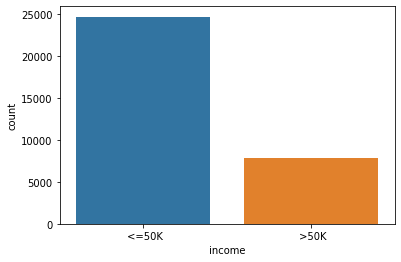

In [7]:
sns.countplot(x="income",data=df)
plt.show()

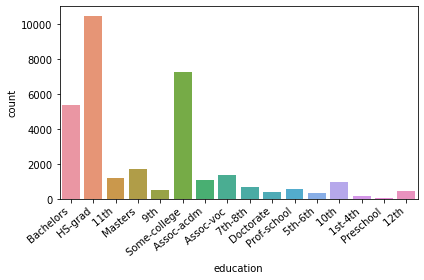

In [11]:
ax=sns.countplot(x="education",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

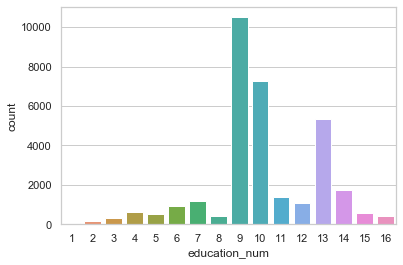

In [179]:
sns.countplot(x="education_num",data=df)
plt.show()

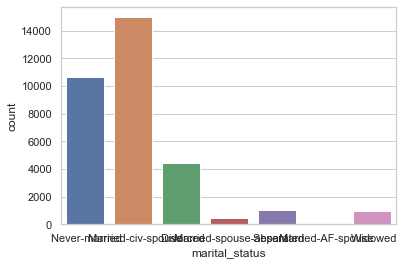

In [180]:
sns.countplot(x="marital_status",data=df)
plt.show()

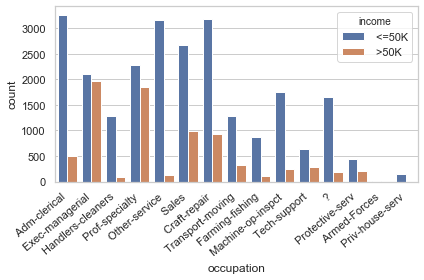

In [181]:
ax=sns.countplot(x="occupation",hue="income",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

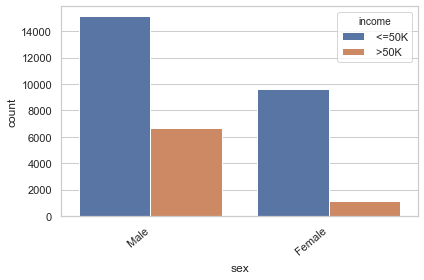

In [182]:
ax=sns.countplot(x="sex",hue="income",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

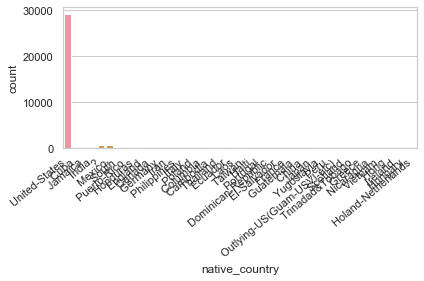

In [183]:
ax=sns.countplot(x="native_country",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

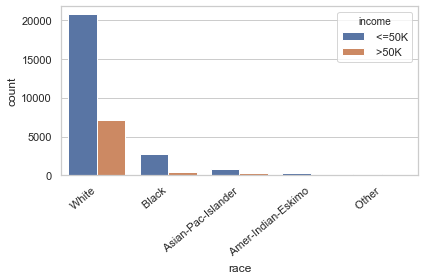

In [185]:
ax=sns.countplot(x="race",hue="income",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

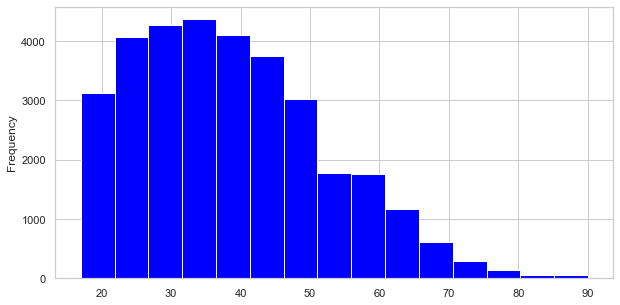

In [186]:
df["age"].plot.hist(bins=15,figsize=(10,5),color="blue")
plt.show()

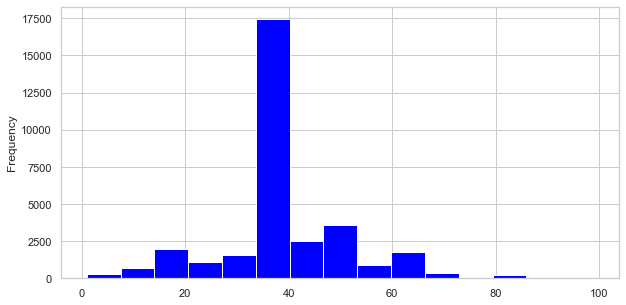

In [187]:
df["hours_per_week"].plot.hist(bins=15,figsize=(10,5),color="blue")
plt.show()

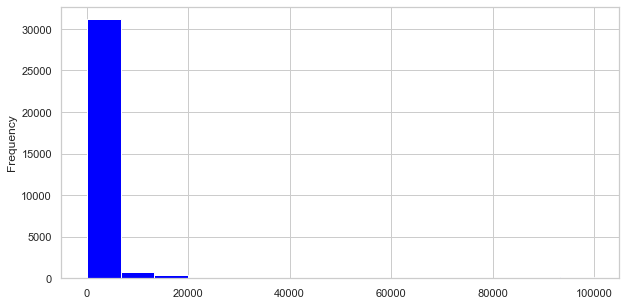

In [188]:
df["capital_gain"].plot.hist(bins=15,figsize=(10,5),color="blue")
plt.show()

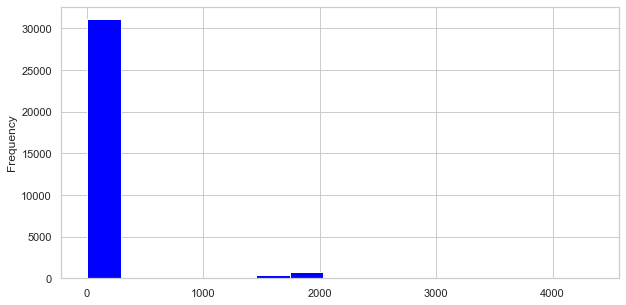

In [189]:
df["capital_loss"].plot.hist(bins=15,figsize=(10,5),color="blue")
plt.show()

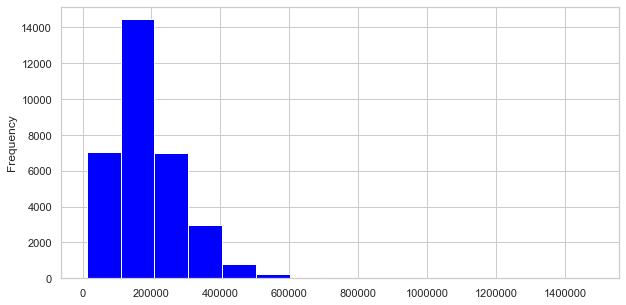

In [190]:
df["fnlwgt"].plot.hist(bins=15,figsize=(10,5),color="blue")
plt.show()

In [134]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

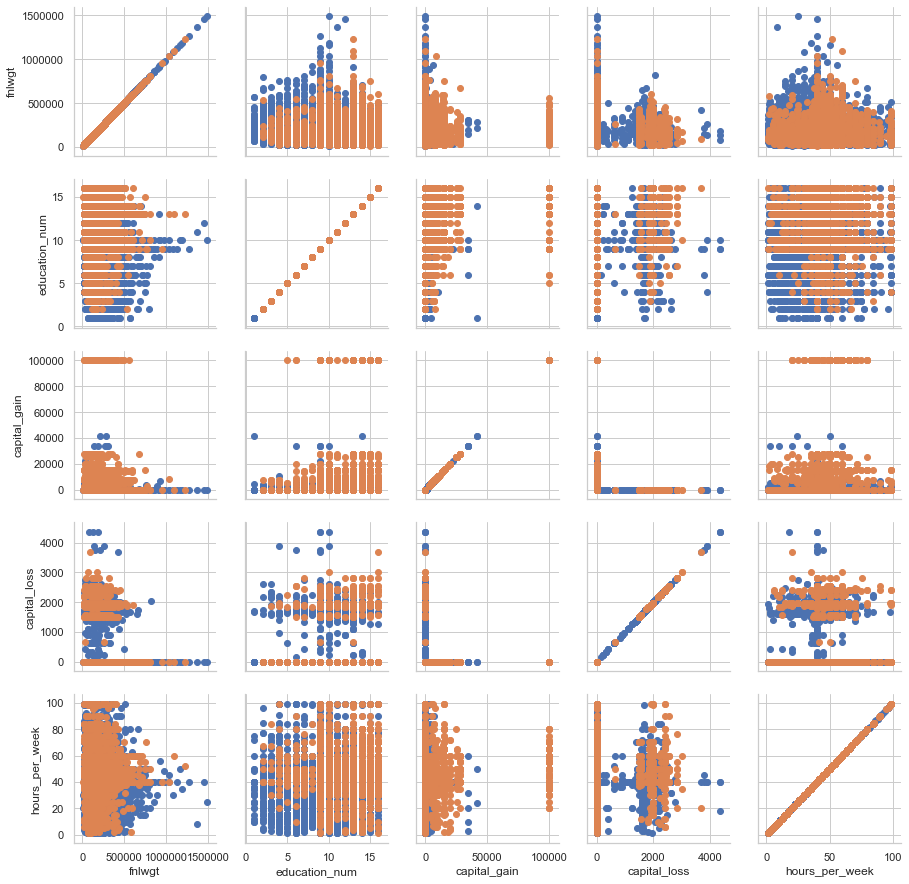

In [192]:
sns.set(style="whitegrid")
b=sns.PairGrid(df.drop(['age', 'workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex','native_country',],axis=1),hue='income')
b.map(plt.scatter)
plt.show()

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

for var in categorical:    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

### Checking Null Values 

In [10]:
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [11]:
df['occupation'].replace(' ?', np.NaN, inplace=True)

In [12]:
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [15]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [16]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
df['age'].nunique()

73

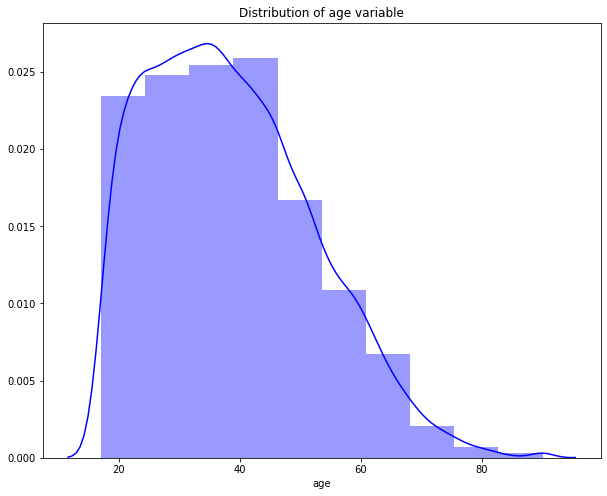

In [19]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

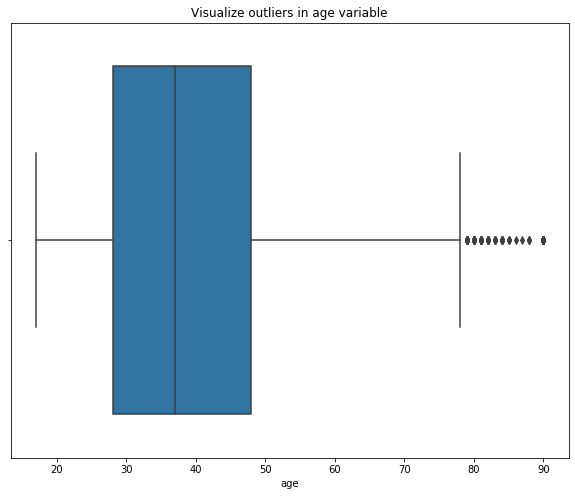

In [20]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

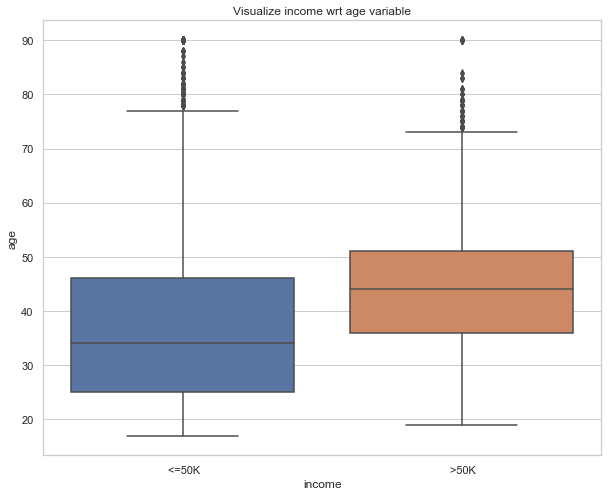

In [204]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

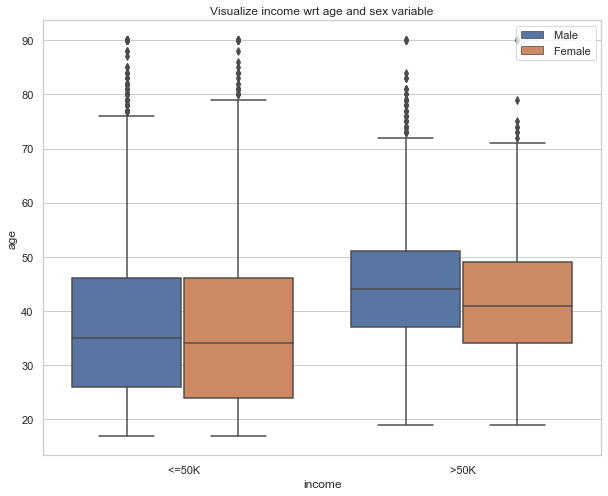

In [205]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

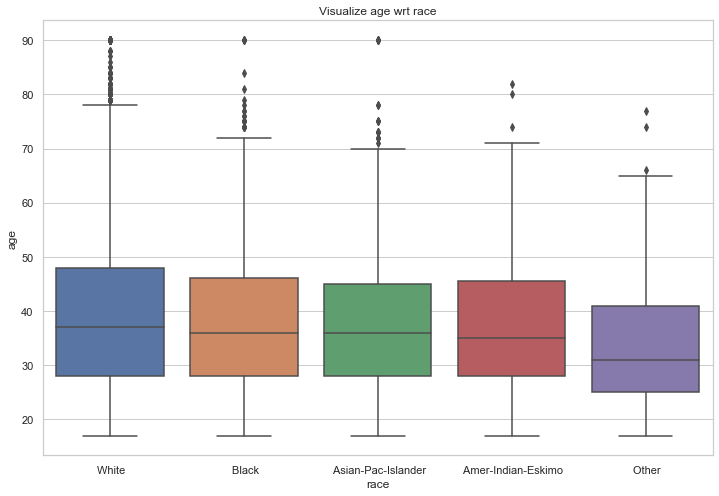

In [206]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Visualize age wrt race")
plt.show()

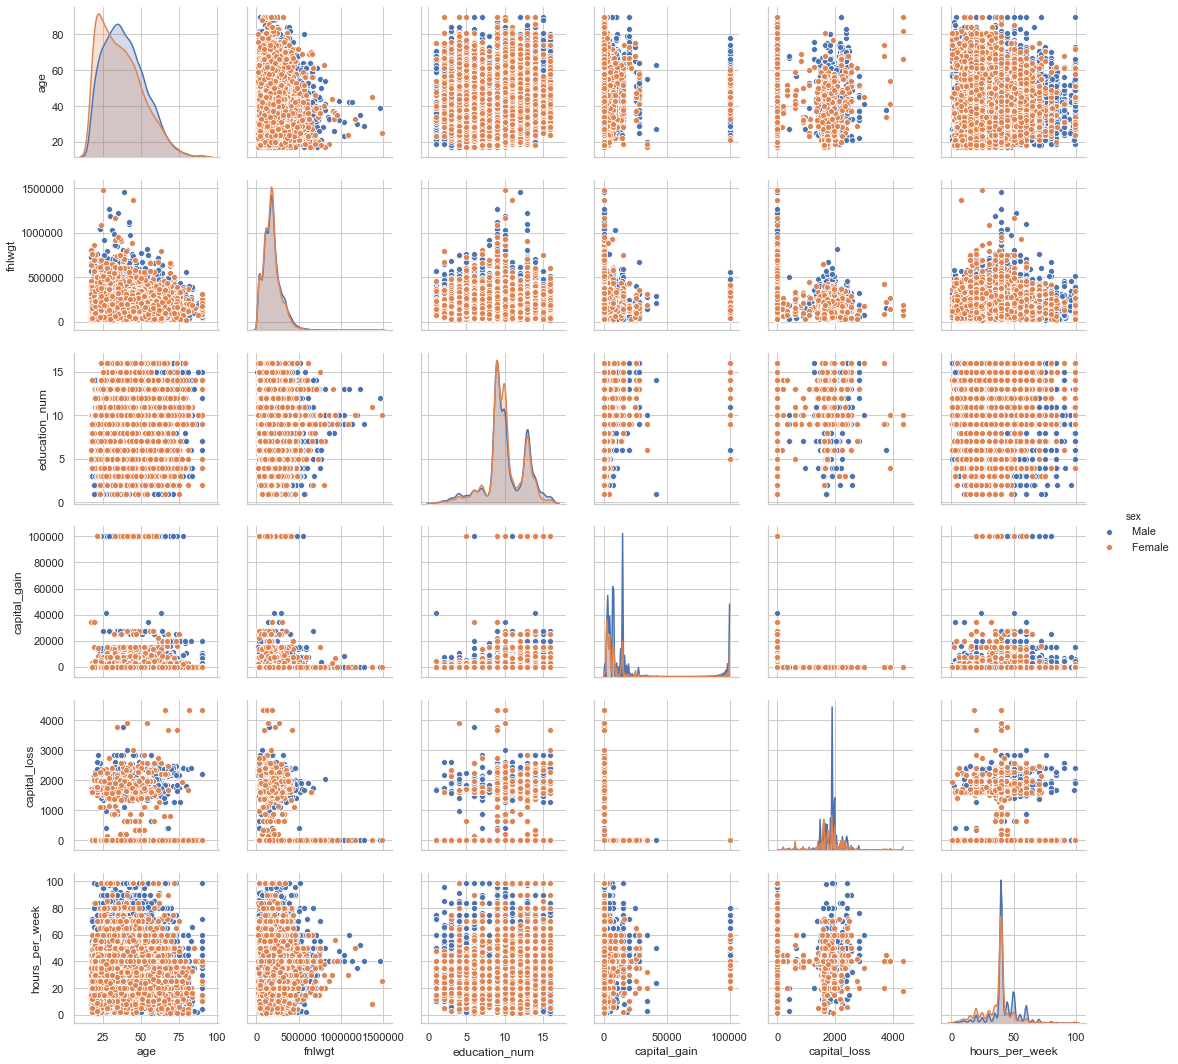

In [207]:
sns.pairplot(df, hue="sex")
plt.show()

### Filling NA values

In [18]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)   

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [20]:
numerical = [col for col in df.columns if df[col].dtypes != 'O' and col != 'income']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [21]:
categorical = [col for col in df.columns if df[col].dtypes == 'O' and col != 'income']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [22]:
income = {' <=50K': 0, ' >50K': 1}
#Assign these different key-value pair from above dictiionary to your table
df.income = [income[item] for item in df.income]

In [23]:
df.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

### Assigning input and output variables

In [24]:
X = df.drop(['income'], axis=1)

y = df['income']

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Scaling features

In [26]:
scaler = StandardScaler()
scaler.fit(X[numerical])
X[numerical]=scaler.transform(X[numerical])

### Dummifiying categiorical variables

In [27]:
X = pd.get_dummies(columns=categorical,data=X,drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [29]:
X_train.shape, X_test.shape

((22792, 97), (9769, 97))

In [30]:
X_train.shape

(22792, 97)

In [31]:
X_test.shape

(9769, 97)

In [56]:
X_test

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
20713,1.203672,0.094124,1.134739,-0.14592,-0.216660,-2.060174,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13495,1.936798,-0.700043,1.134739,-0.14592,-0.216660,-1.655225,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12367,-0.702455,-0.418636,-0.420060,-0.14592,-0.216660,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22402,1.057047,0.395019,2.300838,-0.14592,-0.216660,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18338,-0.482518,-0.782204,1.134739,-0.14592,-0.216660,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,-0.702455,-0.509353,-1.586158,-0.14592,-0.216660,0.612489,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2649,-0.775768,-0.036205,-0.420060,-0.14592,-0.216660,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16353,-0.042642,-0.161285,-0.420060,-0.14592,-0.216660,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6588,-0.995706,-0.106808,-0.031360,-0.14592,3.515776,0.369519,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building(Random Forest)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators=100,max_depth=15)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = clf.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.8838188838188838
Accuracy for Test set:
0.8621148531067663


Recall for Train set:
0.6231751824817519
Recall for Test set:
0.5688267683185091


Precision for Train set:
0.8541770885442721
Precision for Test set:
0.8032296650717703


F1 Score for Test set:
0.6660054549962806


In [44]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 27, 36, 54, 100],
           "max_depth" : [3,7,10,15],
           "min_samples_leaf" : [2, 4]}

scores = ['accuracy']

In [46]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("\n")

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print("\n")
    print(clf.best_params_)
    print("\n")
    
    print("Grid scores on training set:")
    print("\n")
    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"
              % (mean, params))


# Tuning hyper-parameters for accuracy


Best parameters set found on training set:


{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 27}


Grid scores on training set:


0.796 for {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 9}
0.783 for {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 27}
0.787 for {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 36}
0.784 for {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 54}
0.787 for {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 100}
0.794 for {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 9}
0.784 for {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 27}
0.787 for {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 36}
0.787 for {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 54}
0.787 for {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
0.839 for {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 9}
0.847 for {'max_depth': 7, 'min_samples_leaf': 2, '

In [47]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
CV_rfc.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [48]:
print(CV_rfc.best_score_, CV_rfc.best_params_)

0.8589418478086683 {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 36}


In [49]:
y_pred_test=CV_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.8602722898966118


In [67]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

capital_gain                          0.156865
marital_status_ Married-civ-spouse    0.142708
education_num                         0.098832
age                                   0.082899
marital_status_ Never-married         0.055571
                                        ...   
workclass_ Without-pay                0.000013
native_country_ Honduras              0.000010
workclass_ Never-worked               0.000003
occupation_ Armed-Forces              0.000003
native_country_ Holand-Netherlands    0.000000
Length: 97, dtype: float64

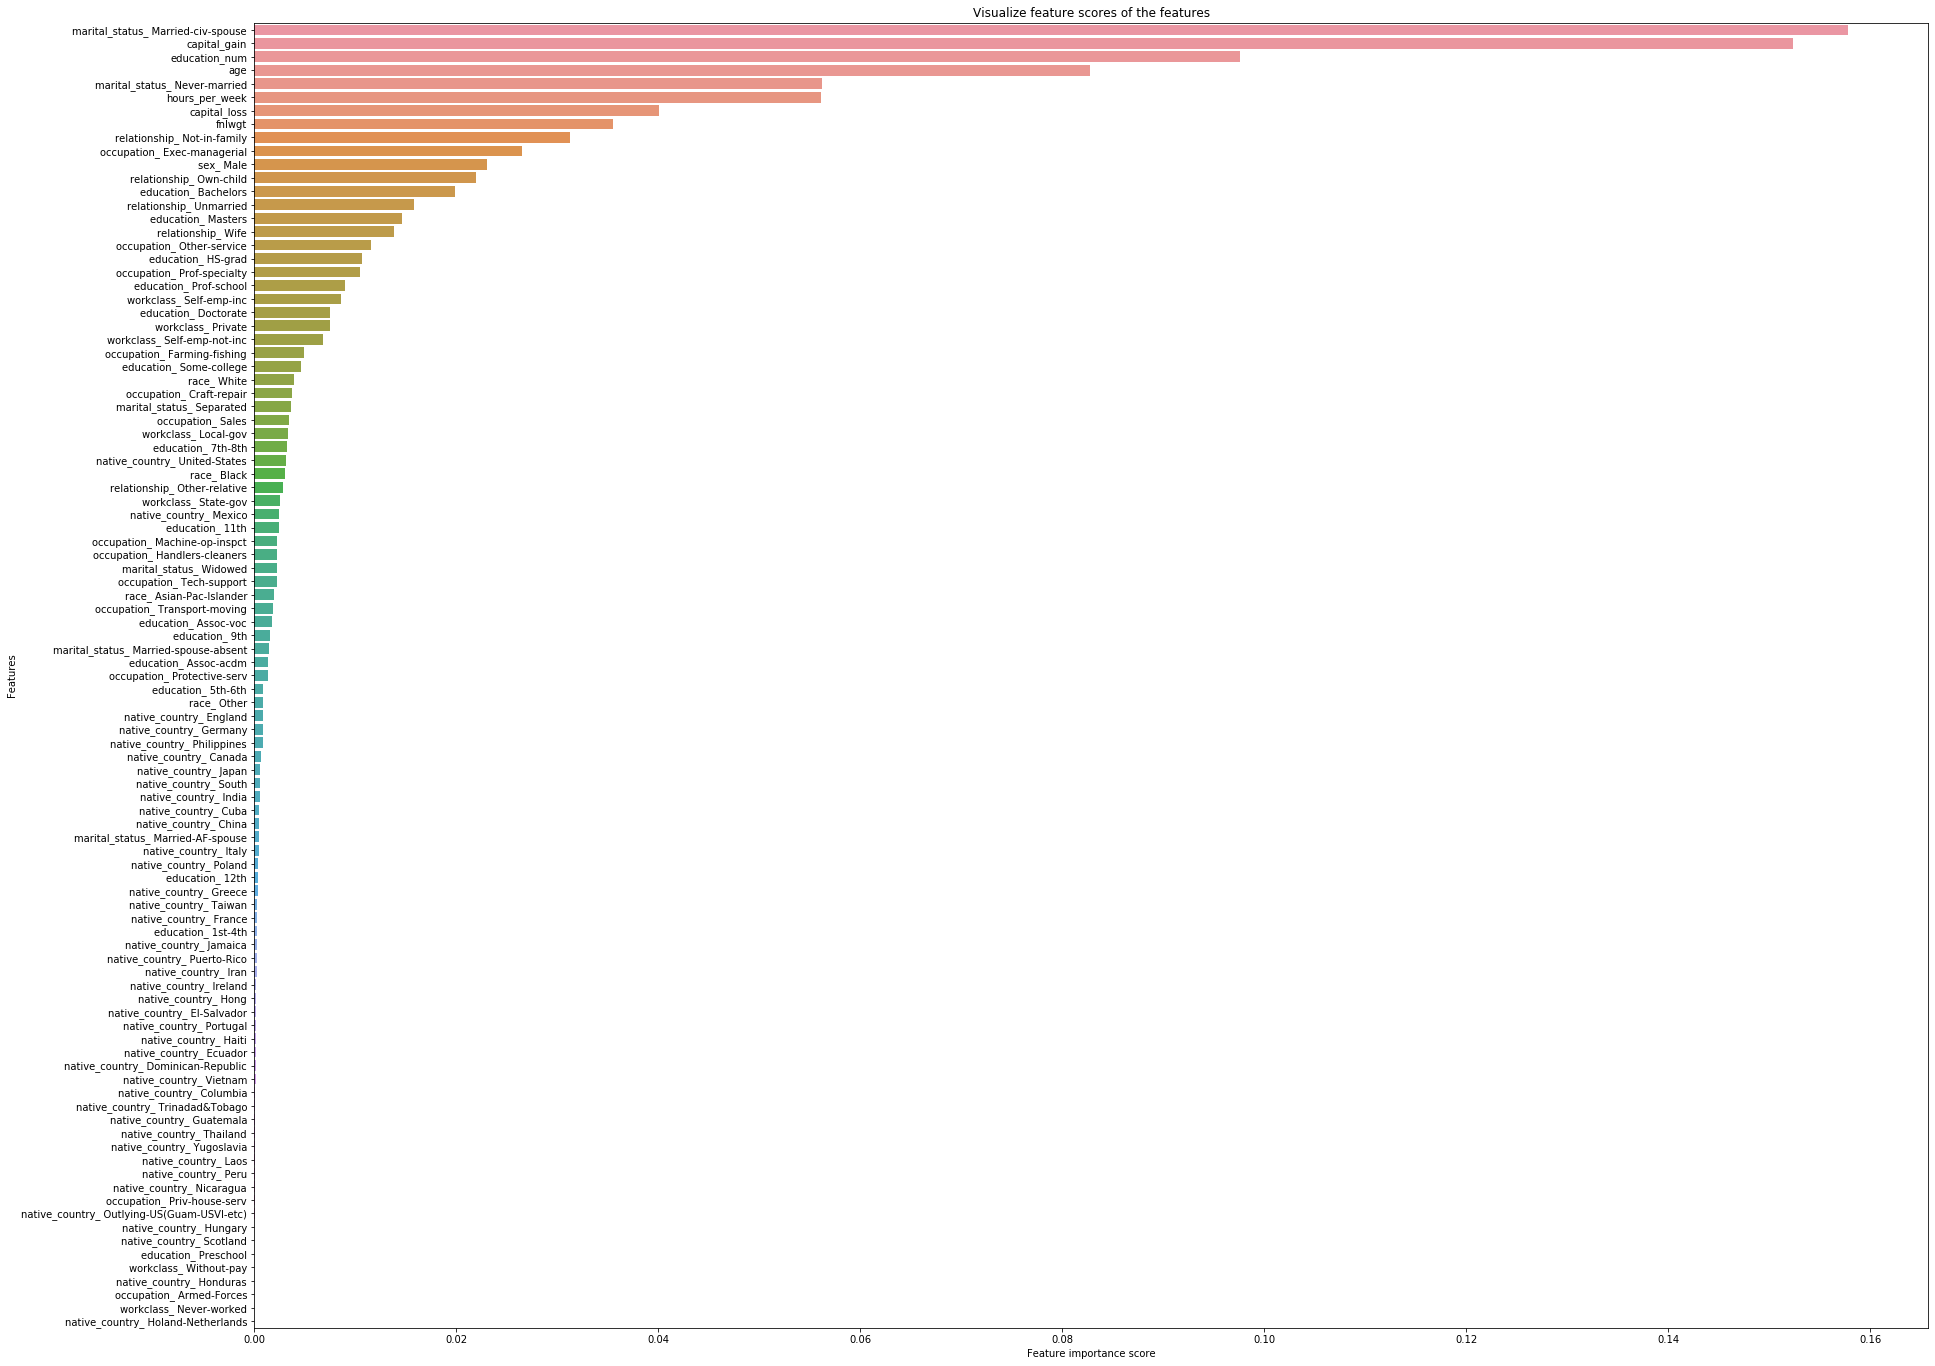

In [184]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7084  324]
 [1041 1320]]


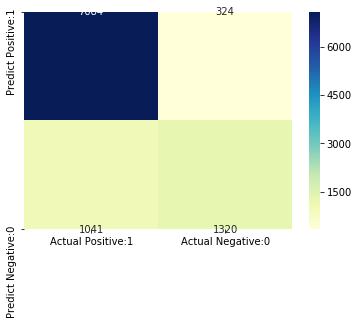

In [52]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Model Building XGBoost

In [32]:
from xgboost import XGBClassifier

In [33]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Wall time: 49.1 s
0.8719418568942573


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred = XGB_model.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = XGB_model.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Train set:")
print(f1_score(y_train,y_pred))
print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.8849596349596349
Accuracy for Test set:
0.8719418568942573


Recall for Train set:
0.6764598540145985
Recall for Test set:
0.6476069462092334


Precision for Train set:
0.8136523266022827
Precision for Test set:
0.7849075975359343


F1 Score for Train set:
0.7387405340773215
F1 Score for Test set:
0.7096774193548386


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
print(confusion_matrix(y_test, y_pred_test))

[[6989  419]
 [ 832 1529]]


#### Model Building Loigistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
y_pred=lg.predict(X_test)

In [48]:
y_pred = lg.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = lg.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.852009477009477
Accuracy for Test set:
0.8509571092230526


Recall for Train set:
0.6009124087591241
Recall for Test set:
0.5819567979669632


Precision for Train set:
0.7352087519535611
Precision for Test set:
0.7455236028214867


F1 Score for Test set:
0.6536631779257849


### Conclusions and Saving the best model using pickle

In [49]:
# XGBoost performs the best among the three models with an F1 score of 0.709

In [50]:
import pickle

In [53]:
filename = 'income_classification_model.sav'
pickle.dump(XGB_model, open(filename, 'wb'))

In [54]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8719418568942573
